In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from functions import all_models as m
from functions import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
%matplotlib inline

In [13]:
df=pd.read_csv('Cleaned Data.csv', index_col=0)
df.head()

,Subject Age Group,Subject ID,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Weapon,Officer Age Group,Day of Week,Year,Month
0,26 - 35,0,No Action,1,White,Asian,Male,0.0,Gen X,Friday,2015,April
1218,1 - 17,0,No Action,1,White,White,Female,0.0,Millenial,Sunday,2015,May
1598,1 - 17,0,Arrest,1,White,American Indian or Alaska Native,Male,0.0,Millenial,Sunday,2015,September
1599,1 - 17,0,No Action,0,Not Specified,Unknown,Male,0.0,Millenial,Sunday,2015,April
1600,1 - 17,0,No Action,1,White,Black or African American,Male,0.0,Gen X,Sunday,2015,April


In [14]:
y = df['Stop Resolution']
x=df.drop(columns=['Stop Resolution'])

In [16]:
x = pd.get_dummies(x, drop_first=True, columns=['Subject Age Group', 'Officer Race', 'Subject Perceived Race', 
                                                'Subject Perceived Gender', 'Weapon', 
                                                'Officer Age Group', 'Day of Week', 'Year', 'Month'])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)

Logistic Regression Results:


C:\Users\ferra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


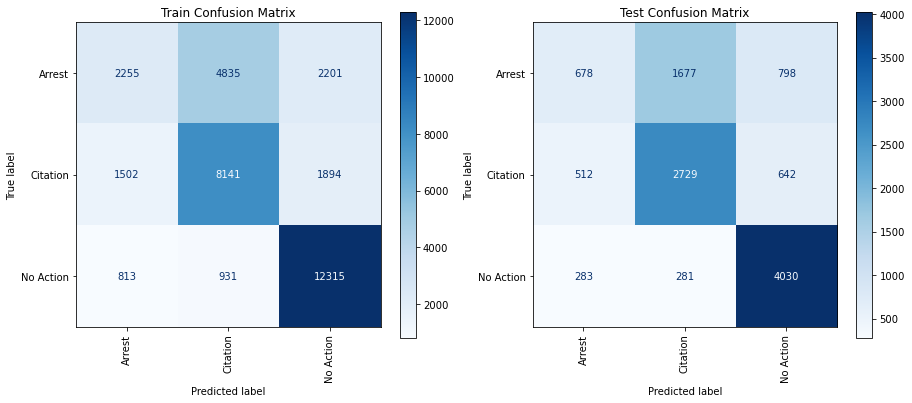

              precision    recall  f1-score   support

      Arrest       0.46      0.22      0.29      3153
    Citation       0.58      0.70      0.64      3883
   No Action       0.74      0.88      0.80      4594

    accuracy                           0.64     11630
   macro avg       0.59      0.60      0.58     11630
weighted avg       0.61      0.64      0.61     11630



K-Nearest Neighbors Results:


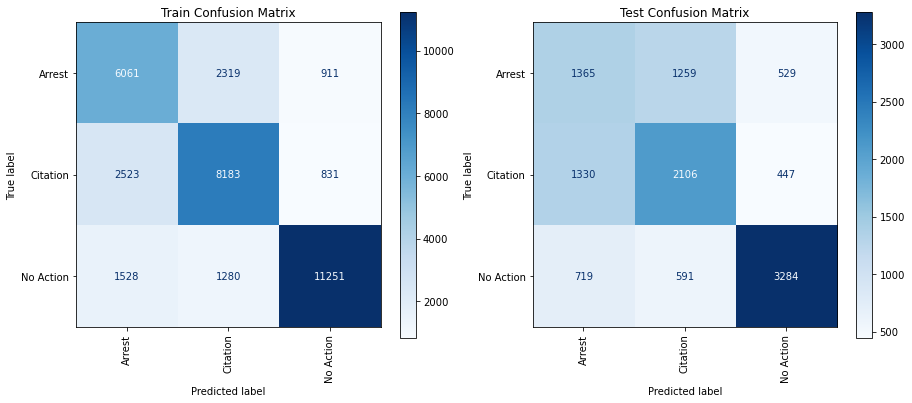

              precision    recall  f1-score   support

      Arrest       0.40      0.43      0.42      3153
    Citation       0.53      0.54      0.54      3883
   No Action       0.77      0.71      0.74      4594

    accuracy                           0.58     11630
   macro avg       0.57      0.56      0.56     11630
weighted avg       0.59      0.58      0.59     11630



Naive Bayes Results:


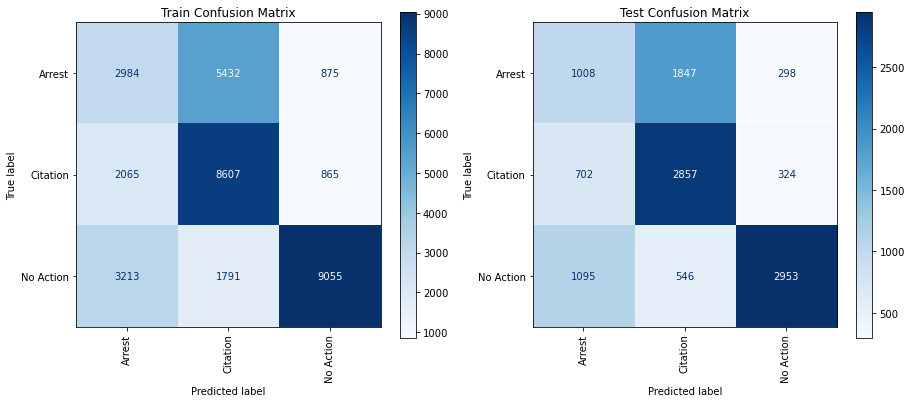

              precision    recall  f1-score   support

      Arrest       0.36      0.32      0.34      3153
    Citation       0.54      0.74      0.63      3883
   No Action       0.83      0.64      0.72      4594

    accuracy                           0.59     11630
   macro avg       0.58      0.57      0.56     11630
weighted avg       0.61      0.59      0.59     11630



Decision Tree Results:


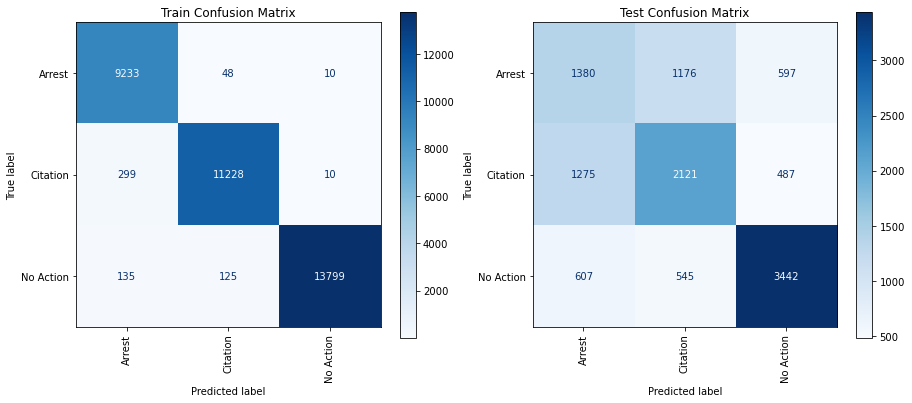

              precision    recall  f1-score   support

      Arrest       0.42      0.44      0.43      3153
    Citation       0.55      0.55      0.55      3883
   No Action       0.76      0.75      0.75      4594

    accuracy                           0.60     11630
   macro avg       0.58      0.58      0.58     11630
weighted avg       0.60      0.60      0.60     11630



Random Forest Results:


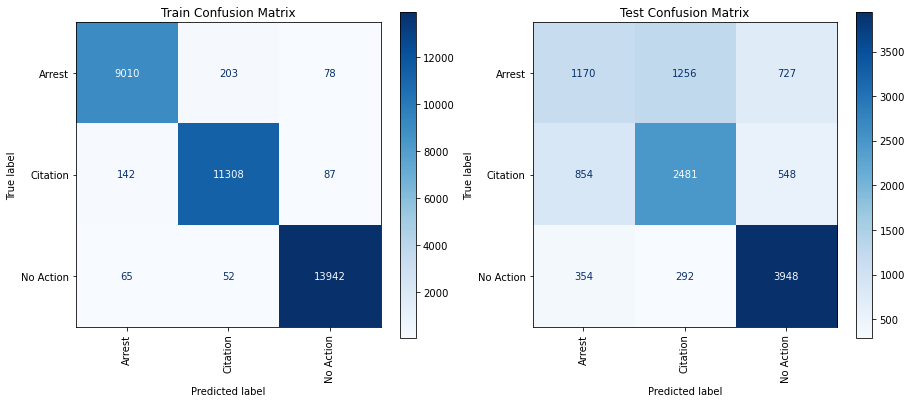

              precision    recall  f1-score   support

      Arrest       0.49      0.37      0.42      3153
    Citation       0.62      0.64      0.63      3883
   No Action       0.76      0.86      0.80      4594

    accuracy                           0.65     11630
   macro avg       0.62      0.62      0.62     11630
weighted avg       0.64      0.65      0.64     11630



XGBoost Results:
[22:11:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ferra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


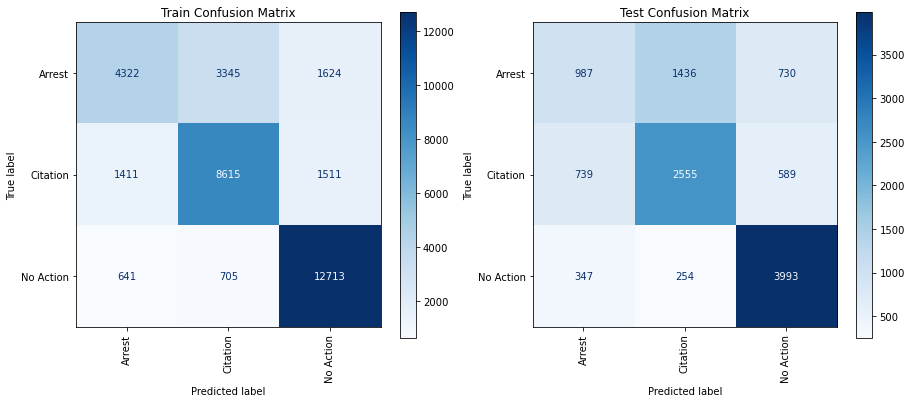

              precision    recall  f1-score   support

      Arrest       0.48      0.31      0.38      3153
    Citation       0.60      0.66      0.63      3883
   No Action       0.75      0.87      0.81      4594

    accuracy                           0.65     11630
   macro avg       0.61      0.61      0.60     11630
weighted avg       0.63      0.65      0.63     11630



Support Vector Machine Results:


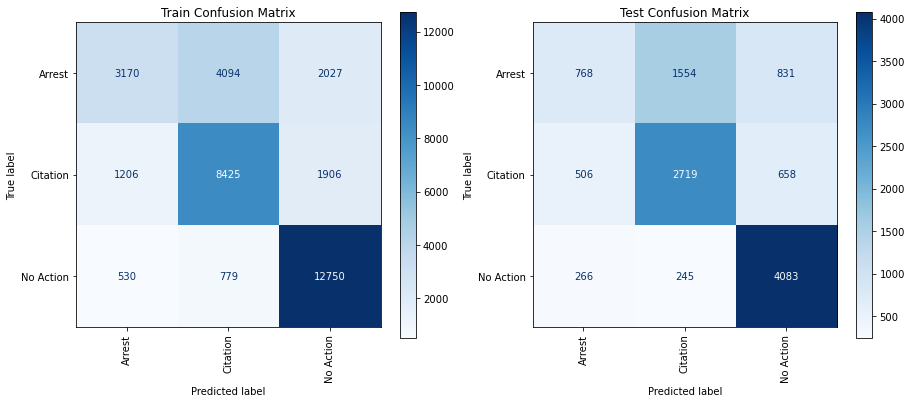

              precision    recall  f1-score   support

      Arrest       0.50      0.24      0.33      3153
    Citation       0.60      0.70      0.65      3883
   No Action       0.73      0.89      0.80      4594

    accuracy                           0.65     11630
   macro avg       0.61      0.61      0.59     11630
weighted avg       0.63      0.65      0.62     11630





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,59.31%,59.84%,63.95%,57.70%
K-Nearest Neighbors,56.77%,56.34%,58.08%,56.49%
Naive Bayes,57.65%,56.61%,58.62%,56.23%
Decision Tree,57.85%,57.77%,59.70%,57.81%
Random Forest,62.12%,62.31%,65.34%,61.82%
XGBoost,60.99%,61.34%,64.79%,60.42%
Support Vector Machine,61.11%,61.09%,65.09%,59.26%


The model with the highest precision score is Random Forest.
The model with the highest recall score is Random Forest.
The model with the highest accuracy score is Random Forest.
The model with the highest F1 score is Random Forest.


In [6]:
models = m(x_train, x_test, y_train, y_test)

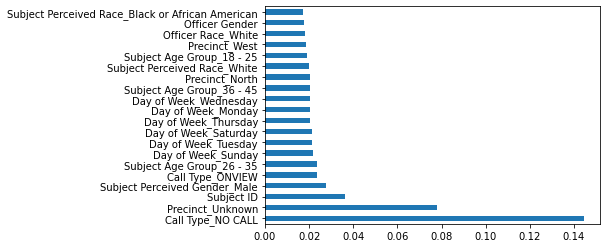

In [7]:
f_import = pd.Series(models[4].feature_importances_, index=x.columns)
f_import.nlargest(20).plot(kind='barh');

## Iteration 1 -- Grid Search

In [8]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [18]:
grid_search_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 100]})

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}


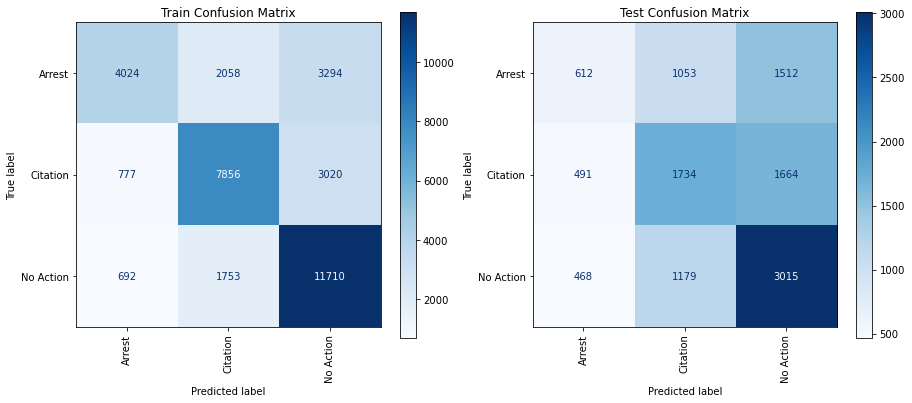

              precision    recall  f1-score   support

      Arrest       0.39      0.19      0.26      3177
    Citation       0.44      0.45      0.44      3889
   No Action       0.49      0.65      0.56      4662

    accuracy                           0.46     11728
   macro avg       0.44      0.43      0.42     11728
weighted avg       0.44      0.46      0.44     11728





In [19]:
print(f"Optimal Parameters: {grid_search_model.best_params_}")

metrics(grid_search_model, x_train, y_train, x_test, y_test)

In [20]:
prediction = grid_search_model.predict(x_test)
print(f"The model's precision score is {precision_score(y_test, prediction, average='macro'):.2%}.")
print(f"The model's recall score is {recall_score(y_test, prediction, average='macro'):.2%}.")
print(f"The model's accuracy score is {accuracy_score(y_test, prediction):.2%}.")
print(f"The model's F1 score is {f1_score(y_test, prediction, average='macro'):.2%}.")

The model's precision score is 43.79%.
The model's recall score is 42.84%.
The model's accuracy score is 45.71%.
The model's F1 score is 41.83%.


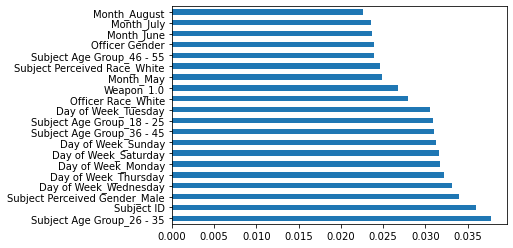

In [21]:
f_import_2 = pd.Series(grid_search_model.best_estimator_.feature_importances_, index=x.columns)
f_import_2.nlargest(20).plot(kind='barh');